In [6]:
# Kitabxanaları import edirik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()


Saving city_traffic_accidents_sample.csv to city_traffic_accidents_sample.csv


In [8]:
df = pd.read_csv('city_traffic_accidents_sample.csv')

In [10]:
# Missing values yoxlanışı
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_df.sort_values(by='Missing Values', ascending=False)


,Missing Values,Percentage (%)
accident_id,0,0.0
city,0,0.0
severity,0,0.0
weather,0,0.0
road_condition,0,0.0
num_vehicles,0,0.0
num_injuries,0,0.0
num_fatalities,0,0.0
timestamp,0,0.0


In [12]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

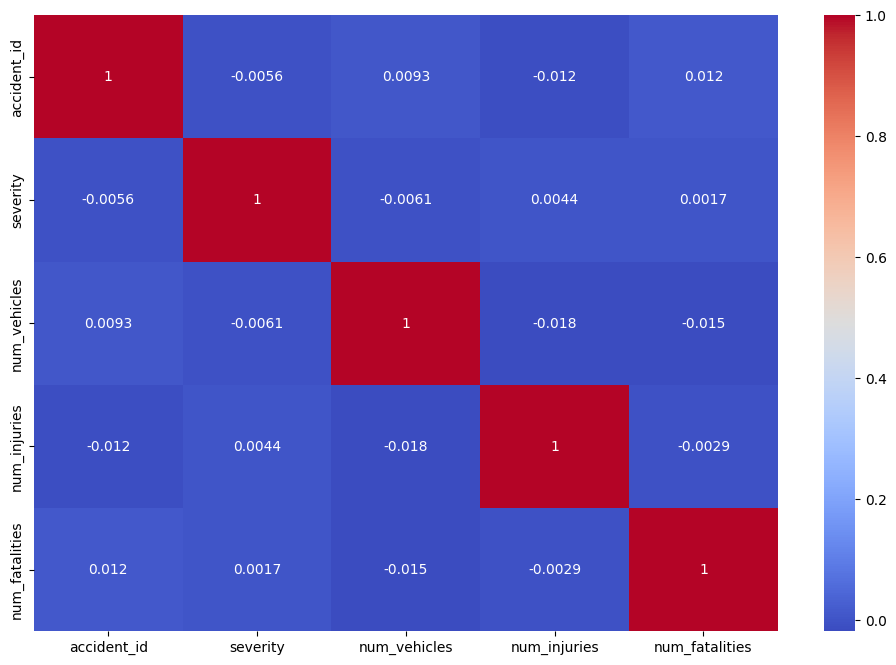

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipython-input-2537662960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='city', order=df['city'].value_counts().index, palette="viridis")


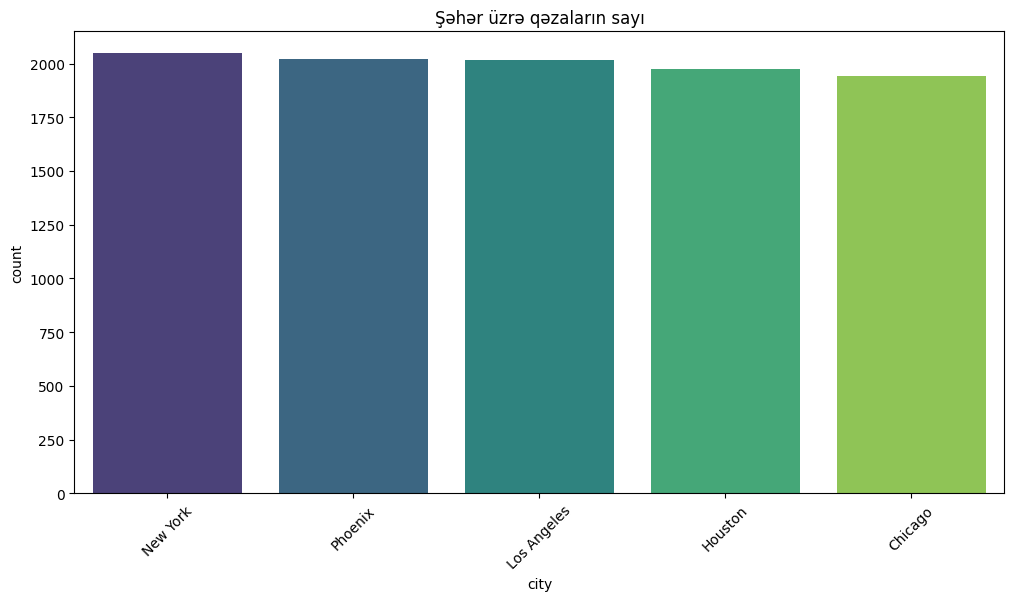

/tmp/ipython-input-2537662960.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='severity', palette="magma")


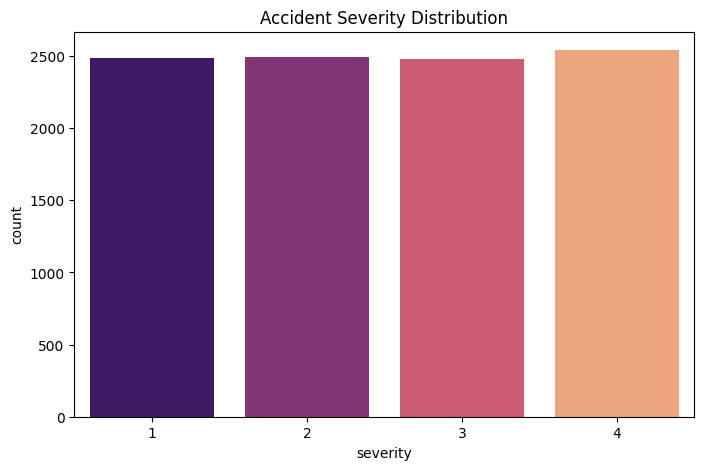

/tmp/ipython-input-2537662960.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index, palette="coolwarm")


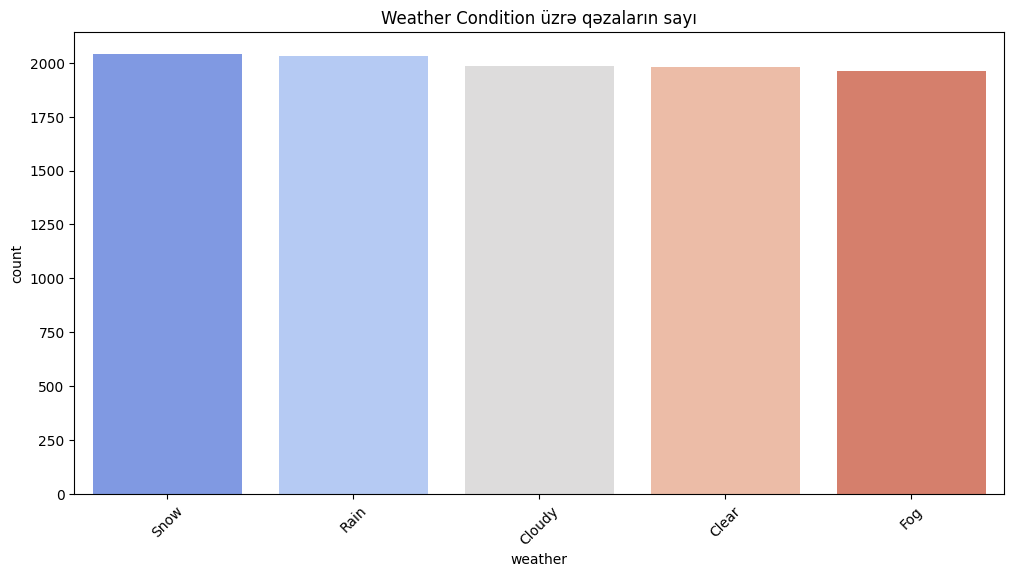

In [17]:
# Şəhər üzrə qəzaların sayı
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='city', order=df['city'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Şəhər üzrə qəzaların sayı")
plt.show()

# Severity (qəzaların ciddi səviyyəsi) paylanması
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='severity', palette="magma")
plt.title("Accident Severity Distribution")
plt.show()

# Weather (hava şəraiti) üzrə qəzalar
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Weather Condition üzrə qəzaların sayı")
plt.show()


In [18]:
# Şəhər üzrə statistik summary
city_stats = df.groupby('city').agg({
    'accident_id': 'count',       # Qəzaların sayı
    'num_vehicles': 'mean',       # Orta maşın sayı
    'num_injuries': 'sum',        # Ümumi yaralananlar
    'num_fatalities': 'sum'       # Ümumi ölümlər
}).rename(columns={'accident_id': 'total_accidents', 'num_vehicles': 'avg_vehicles'})

# City üzrə statistikaları böyükdən kiçiyə sıralayaq
city_stats = city_stats.sort_values(by='total_accidents', ascending=False)
city_stats


,total_accidents,avg_vehicles,num_injuries,num_fatalities
city,,,,
New York,2047,2.549585,2002,487
Phoenix,2019,2.505696,2046,486
Los Angeles,2016,2.463790,1997,507
Houston,1975,2.548354,1993,483
Chicago,1943,2.501801,1950,474


/tmp/ipython-input-1901539193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='severity', palette="magma")


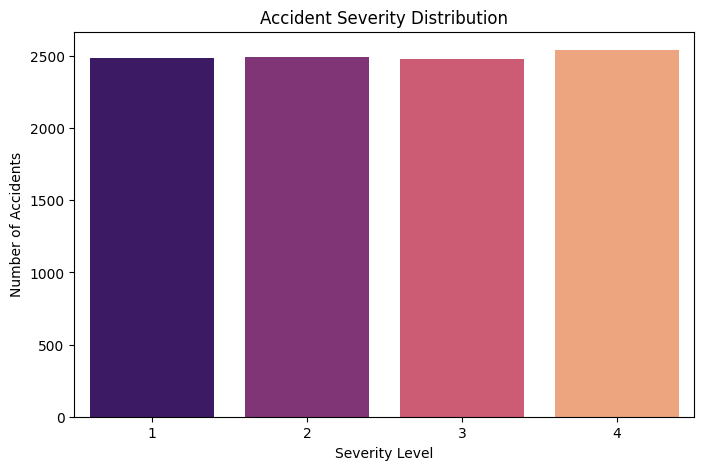

/tmp/ipython-input-1901539193.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index, palette="coolwarm")


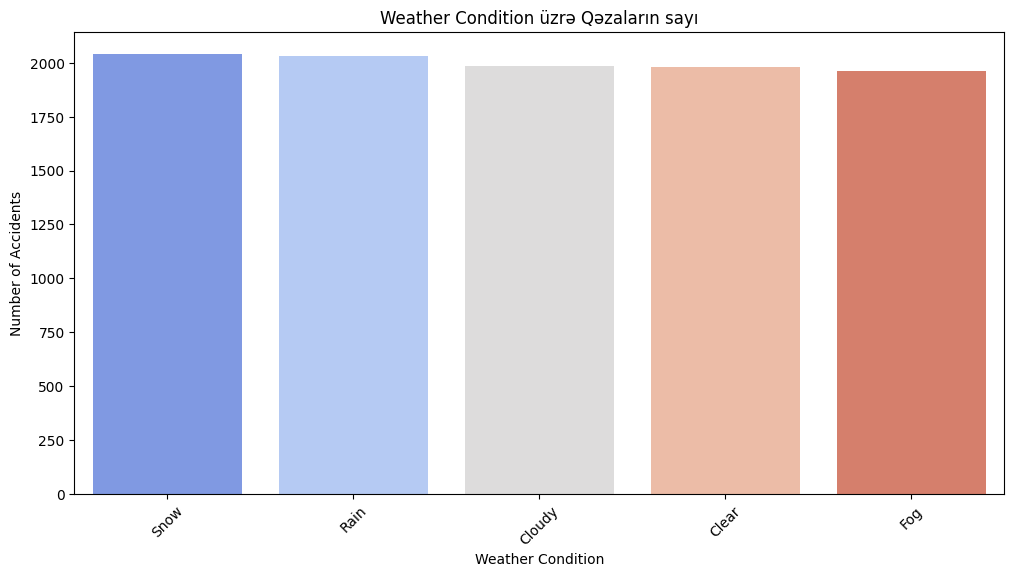

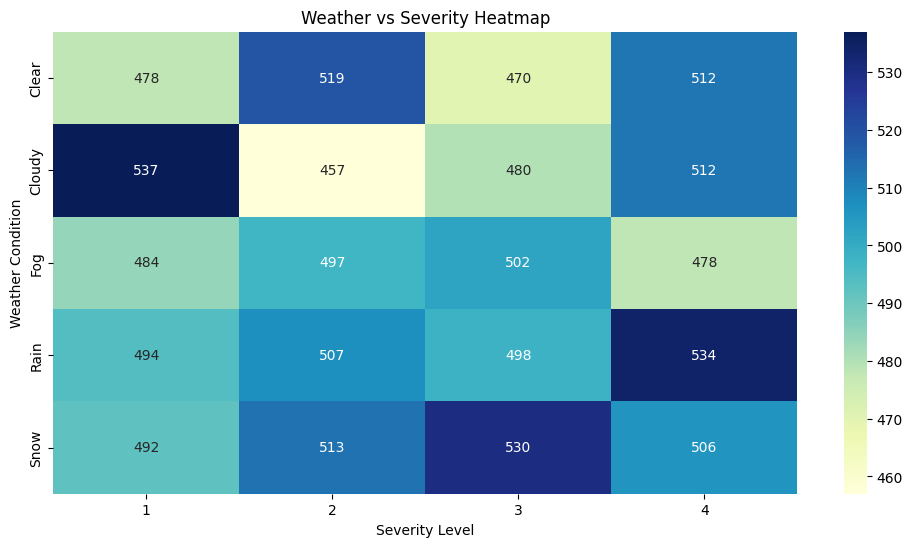

In [19]:
# Severity paylanması
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='severity', palette="magma")
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()

# Weather condition üzrə qəzaların sayı
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Weather Condition üzrə Qəzaların sayı")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()

# Severity və Weather əlaqəsi (heatmap)
severity_weather = pd.crosstab(df['weather'], df['severity'])
plt.figure(figsize=(12,6))
sns.heatmap(severity_weather, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Weather vs Severity Heatmap")
plt.ylabel("Weather Condition")
plt.xlabel("Severity Level")
plt.show()


/tmp/ipython-input-2852704524.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour', palette="viridis")


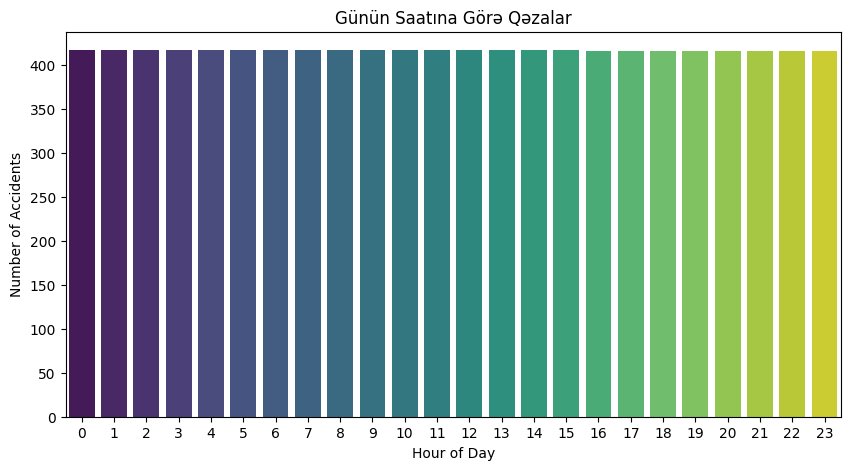

/tmp/ipython-input-2852704524.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette="coolwarm", order=range(1,13))


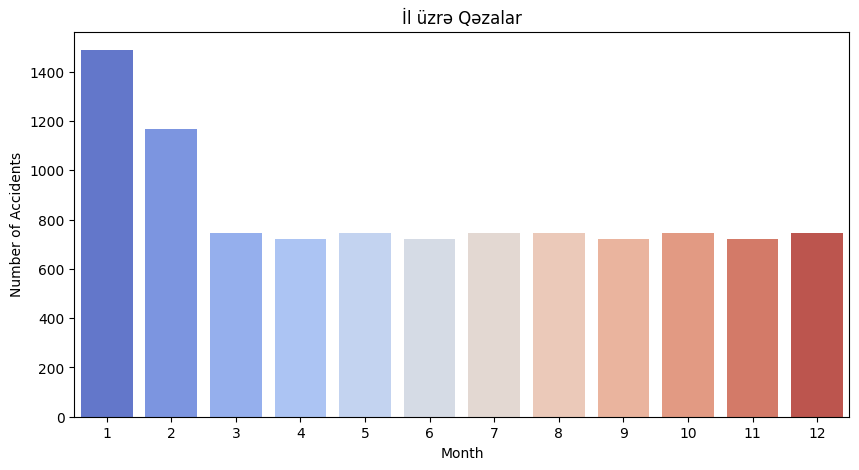

In [20]:
# Timestamp sütununu datetime formatına çeviririk
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Saat və ay sütunlarını əlavə edirik
df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month

# Saat üzrə qəzaların sayı
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hour', palette="viridis")
plt.title("Günün Saatına Görə Qəzalar")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

# Ay üzrə qəzaların sayı
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='month', palette="coolwarm", order=range(1,13))
plt.title("İl üzrə Qəzalar")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()
